### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [38]:
# Dicionário com os DataFrames
lojas = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

# Cálculo e exibição dos faturamentos
for nome, df in lojas.items():
    faturamento = df['Preço'].sum()
    print(f"O faturamento da {nome} foi de: R$ {faturamento:,.2f}")

O faturamento da Loja 1 foi de: R$ 1,534,509.12
O faturamento da Loja 2 foi de: R$ 1,488,459.06
O faturamento da Loja 3 foi de: R$ 1,464,025.03
O faturamento da Loja 4 foi de: R$ 1,384,497.58


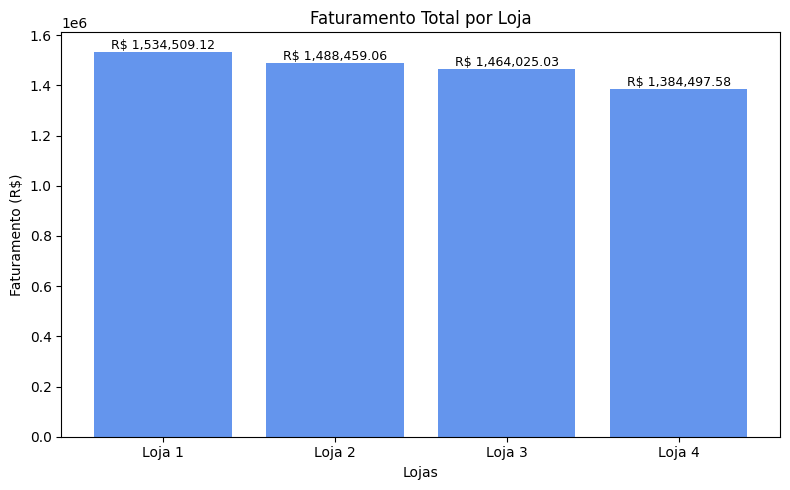

In [56]:
import matplotlib.pyplot as plt

# Faturamentos calculados
faturamentos = {
    "Loja 1": loja['Preço'].sum(),
    "Loja 2": loja2['Preço'].sum(),
    "Loja 3": loja3['Preço'].sum(),
    "Loja 4": loja4['Preço'].sum()
}

# Dados do gráfico
nomes_lojas = list(faturamentos.keys())
valores_faturamento = list(faturamentos.values())

# Gráfico
plt.figure(figsize=(8, 5))
plt.bar(nomes_lojas, valores_faturamento, color='cornflowerblue')

plt.title("Faturamento Total por Loja")
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=0)

# Adiciona o valor acima de cada barra
for i, valor in enumerate(valores_faturamento):
    plt.text(i, valor, f"R$ {valor:,.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [45]:
print("Análise da quantidade de produtos vendidos por categoria em cada loja:\n")

# Loop para análise por loja
for nome_loja, df in lojas.items():
    categorias = df['Categoria do Produto'].value_counts()
    total_produtos = categorias.sum()

    print(f"{nome_loja}:")
    for categoria, quantidade in categorias.items():
        print(f"- Categoria '{categoria}': {quantidade} produtos vendidos")
    print(f"Total de produtos vendidos pela {nome_loja}: {total_produtos}")
    print("-" * 60)


Análise da quantidade de produtos vendidos por categoria em cada loja:

Loja 1:
- Categoria 'moveis': 465 produtos vendidos
- Categoria 'eletronicos': 448 produtos vendidos
- Categoria 'brinquedos': 324 produtos vendidos
- Categoria 'eletrodomesticos': 312 produtos vendidos
- Categoria 'esporte e lazer': 284 produtos vendidos
- Categoria 'instrumentos musicais': 182 produtos vendidos
- Categoria 'livros': 173 produtos vendidos
- Categoria 'utilidades domesticas': 171 produtos vendidos
Total de produtos vendidos pela Loja 1: 2359
------------------------------------------------------------
Loja 2:
- Categoria 'moveis': 442 produtos vendidos
- Categoria 'eletronicos': 422 produtos vendidos
- Categoria 'brinquedos': 313 produtos vendidos
- Categoria 'eletrodomesticos': 305 produtos vendidos
- Categoria 'esporte e lazer': 275 produtos vendidos
- Categoria 'instrumentos musicais': 224 produtos vendidos
- Categoria 'livros': 197 produtos vendidos
- Categoria 'utilidades domesticas': 181 prod

# 3. Média de Avaliação das Lojas

In [35]:
# Função para calcular a média de avaliação
def media_avaliacao(df):
    return round(df['Avaliação da compra'].mean(), 2)

print("Média de avaliação dos clientes por loja:\n")

# Loop para exibir a média de cada loja
for nome_loja, df in lojas.items():
    media = media_avaliacao(df)
    print(f"{nome_loja}: {media}")

Média de avaliação dos clientes por loja:

Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.0


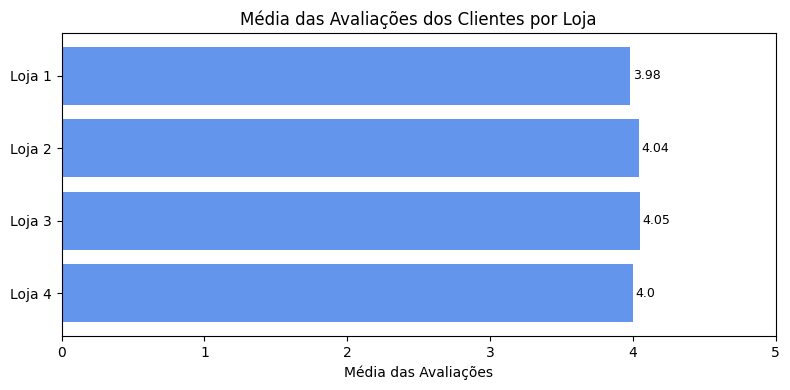

In [55]:
import matplotlib.pyplot as plt

avaliacoes = {
    "Loja 1": round(loja['Avaliação da compra'].mean(), 2),
    "Loja 2": round(loja2['Avaliação da compra'].mean(), 2),
    "Loja 3": round(loja3['Avaliação da compra'].mean(), 2),
    "Loja 4": round(loja4['Avaliação da compra'].mean(), 2)
}

# Ordem original
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias_avaliacoes = [avaliacoes[loja] for loja in nomes_lojas]

# Invertendo para o gráfico ficar Loja 1 no topo
nomes_lojas_invertido = nomes_lojas[::-1]
medias_avaliacoes_invertido = medias_avaliacoes[::-1]

plt.figure(figsize=(8, 4))
plt.barh(nomes_lojas_invertido, medias_avaliacoes_invertido, color='cornflowerblue')
plt.xlabel('Média das Avaliações')
plt.title('Média das Avaliações dos Clientes por Loja')

for i, valor in enumerate(medias_avaliacoes_invertido):
    plt.text(valor + 0.02, i, f"{valor}", va='center', fontsize=9)

plt.xlim(0, 5)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [41]:
print("Produtos mais e menos vendidos por loja:\n")

for nome_loja, df in lojas.items():
    vendas_produtos = df['Produto'].value_counts()

    produto_mais_vendido = vendas_produtos.idxmax()
    qtd_mais_vendido = vendas_produtos.max()

    produto_menos_vendido = vendas_produtos.idxmin()
    qtd_menos_vendido = vendas_produtos.min()

    print(f"{nome_loja}:")
    print(f"Produto mais vendido: '{produto_mais_vendido}' com {qtd_mais_vendido} vendas")
    print(f"Produto menos vendido: '{produto_menos_vendido}' com {qtd_menos_vendido} vendas")
    print("-" * 60)

Produtos mais e menos vendidos por loja:

Loja 1:
Produto mais vendido: 'Micro-ondas' com 60 vendas
Produto menos vendido: 'Headset' com 33 vendas
------------------------------------------------------------
Loja 2:
Produto mais vendido: 'Iniciando em programação' com 65 vendas
Produto menos vendido: 'Jogo de tabuleiro' com 32 vendas
------------------------------------------------------------
Loja 3:
Produto mais vendido: 'Kit banquetas' com 57 vendas
Produto menos vendido: 'Blocos de montar' com 35 vendas
------------------------------------------------------------
Loja 4:
Produto mais vendido: 'Cama box' com 62 vendas
Produto menos vendido: 'Guitarra' com 33 vendas
------------------------------------------------------------


# 5. Frete Médio por Loja


In [42]:
# Função para calcular o frete médio
def calcular_frete_medio(df):
    return round(df['Frete'].mean(), 2)

print("Custo médio de frete por loja:\n")

for nome_loja, df in lojas.items():
    frete_medio = calcular_frete_medio(df)
    print(f"{nome_loja}: R$ {frete_medio:,.2f}")

Custo médio de frete por loja:

Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


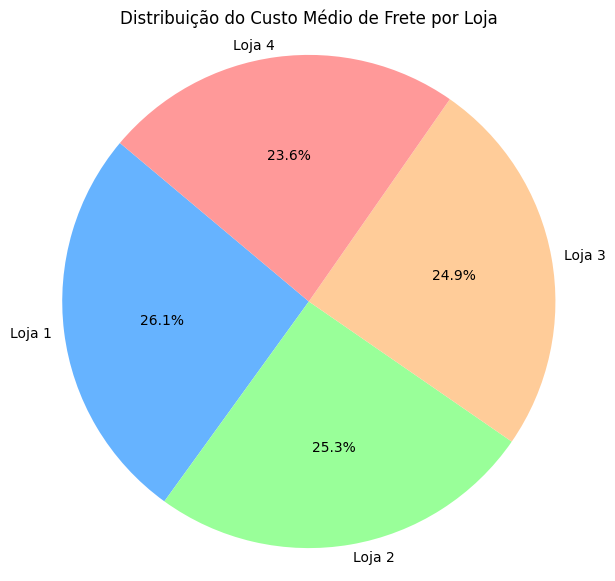

In [58]:
import matplotlib.pyplot as plt

fretes_medios = {
    "Loja 1": round(loja['Frete'].mean(), 2),
    "Loja 2": round(loja2['Frete'].mean(), 2),
    "Loja 3": round(loja3['Frete'].mean(), 2),
    "Loja 4": round(loja4['Frete'].mean(), 2)
}

nomes_lojas = list(fretes_medios.keys())
valores_fretes = list(fretes_medios.values())

plt.figure(figsize=(7, 7))
plt.pie(
    valores_fretes,
    labels=nomes_lojas,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'],
    labeldistance=1.05  # Valor padrão é ~1.1, diminuindo aproxima os labels
)
plt.title('Distribuição do Custo Médio de Frete por Loja')
plt.axis('equal')
plt.show()

# Relatório Final

Após analisar todos os indicadores — faturamento, quantidade de vendas, média das avaliações, produtos mais e menos vendidos e custo médio do frete — a decisão sobre qual loja deve ser vendida fica mais clara.

A **Loja 4 apresenta o pior desempenho comercial entre as quatro lojas**. Ela tem o menor faturamento total (R$ 1.384.497,58) e o menor volume de vendas, mesmo apresentando o custo médio de frete mais baixo.

Portanto, recomenda-se **vender a Loja 4**, pois é a que demonstra menor potencial de crescimento e rentabilidade.